# Stratified Sampling - Example 2

- Author: Michael D. Shields
- Date: June 05, 2018

In this example, the stratified sampling method is employed to generate samples from an exponential distribution with strata defined by a text file. The method illustrates stratified sampling for cases where the space is not divided equally in all dimensions.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the STS class from UQpy.SampleMethods.

In [1]:
from UQpy.SampleMethods import STS
from UQpy.Distributions import Exponential
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import expon

Run STS for 25 samples.

- 2 dimensions
- Five strata in each dimension
- Exponential distribution with location parameter = 1 and scale parameter = 1.

Create a distribution object.

In [2]:
marginals = [Exponential(loc=1., scale=1.), Exponential(loc=1., scale=1.)]

Run stratified sampling

In [3]:
x_sts = STS(dist_object=marginals, input_file='strata.txt', stype='Rectangular')

Plot the resulting stratified samples and the boundaries of the strata in the U(0,1) space.

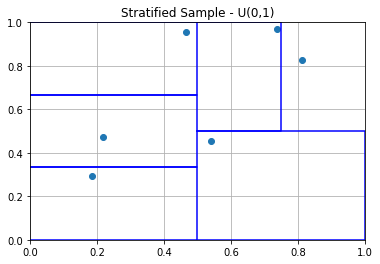

In [4]:
fig, ax = plt.subplots()
plt.title('Stratified Sample - U(0,1)')
plt.scatter(x_sts.samplesU01[:, 0], x_sts.samplesU01[:, 1])
plt.plot([0.0, 0.5, 0.5, 0.0],[0.0, 0.0, 0.333, 0.333],'b')
plt.plot([0.0, 0.5, 0.5, 0.0],[0.333, 0.333, 0.667, 0.667],'b')
plt.plot([0.0, 0.5, 0.5, 0.0],[0.667, 0.667, 1.0, 1.0],'b')
plt.plot([0.5, 1.0, 1.0, 0.5],[0.0, 0.0, 0.5, 0.5],'b')
plt.plot([0.5, 0.75, 0.75, 0.5],[0.5, 0.5, 1.0, 1.0],'b')
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

In [5]:
print(x_sts.strata.weights)

[0.166665 0.166665 0.166665 0.25     0.125    0.125   ]


Plot the resulting stratified exponential samples and the boundaries of the strata in the exponential space.

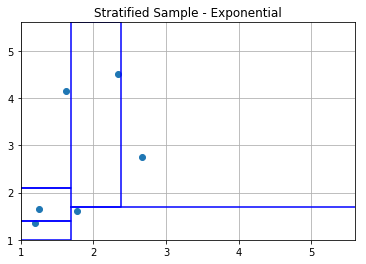

In [6]:
fig, ax = plt.subplots()
plt.title('Stratified Sample - Exponential')
plt.scatter(x_sts.samples[:, 0], x_sts.samples[:, 1])
plt.plot(expon.ppf([0.0, 0.5, 0.5, 0.0],1,1),expon.ppf([0.0, 0.0, 0.333, 0.333],1,1),'b')
plt.plot(expon.ppf([0.0, 0.5, 0.5, 0.0],1,1),expon.ppf([0.333, 0.333, 0.667, 0.667],1,1),'b')
plt.plot(expon.ppf([0.0, 0.5, 0.5, 0.0],1,1),expon.ppf([0.667, 0.667, 0.99, 1.0],1,1),'b')
plt.plot(expon.ppf([0.5, 1.0, 0.99, 0.5],1,1),expon.ppf([0.0, 0.0, 0.5, 0.5],1,1),'b')
plt.plot(expon.ppf([0.5, 0.75, 0.75, 0.5],1,1),expon.ppf([0.5, 0.5, 0.99, 0.99],1,1),'b')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(1, expon.ppf(0.99,1,1))
plt.xlim(1, expon.ppf(0.99,1,1))
plt.show()

In [7]:
print(x_sts.samples)

[[1.203415  1.3491727]
 [1.2475243 1.6425884]
 [1.6293653 4.148248 ]
 [1.780266  1.6100183]
 [2.3346071 4.5108676]
 [2.6701226 2.7597842]]
